<a href="https://colab.research.google.com/github/Prithivi1515/Demo/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA - 1

In [1]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?export=download&id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"
df = pd.read_csv(url)

# Display the first few rows
print(df.head())

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  


1. What is the range of selling prices in the dataset?


In [2]:
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"Range of selling prices: {selling_price_range}")

Range of selling prices: 755000


2. What is the median selling price for bikes in the dataset?


In [3]:
median_selling_price = df['selling_price'].median()
print(f"Median selling price: {median_selling_price}")

Median selling price: 45000.0


3. What is the most common seller type?


In [4]:
most_common_seller_type = df['seller_type'].mode()[0]
print(f"Most common seller type: {most_common_seller_type}")

Most common seller type: Individual


4. How many bikes have driven more than 50,000 kilometers?


In [5]:
bikes_above_50k = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes driven more than 50,000 km: {bikes_above_50k}")

Bikes driven more than 50,000 km: 170


5. What is the average km_driven value for each ownership type?


In [6]:
avg_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_driven_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6. What proportion of bikes are from the year 2015 or older?


In [7]:
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion = bikes_2015_or_older / df.shape[0]
print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 56.64%


7. What is the trend of missing values across the dataset?


In [8]:
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


8. What is the highest ex_showroom_price recorded, and for which bike?


In [9]:
max_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_max_price = df[df['ex_showroom_price'] == max_ex_showroom_price]['name'].values[0]
print(f"Highest ex_showroom price: {max_ex_showroom_price} for bike: {bike_with_max_price}")

Highest ex_showroom price: 1278000.0 for bike: Harley-Davidson Street Bob


9. What is the total number of bikes listed by each seller type?


In [10]:
bikes_by_seller_type = df['seller_type'].value_counts()
print(bikes_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10. What is the relationship between selling_price and km_driven for first-owner bikes?


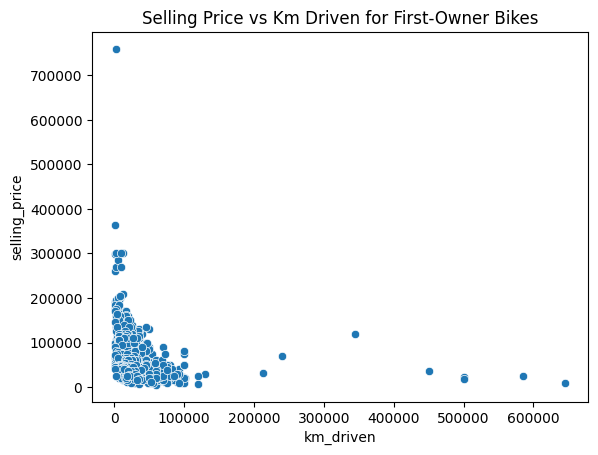

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

first_owner_bikes = df[df['owner'] == '1st owner']
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title("Selling Price vs Km Driven for First-Owner Bikes")
plt.show()

11. Identify and remove outliers in the km_driven column using the IQR method.


In [12]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Dataset shape before removing outliers: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Dataset shape before removing outliers: (1061, 7)
Dataset shape after removing outliers: (1022, 7)


12. Perform a bivariate analysis to visualize the relationship between year and selling_price.


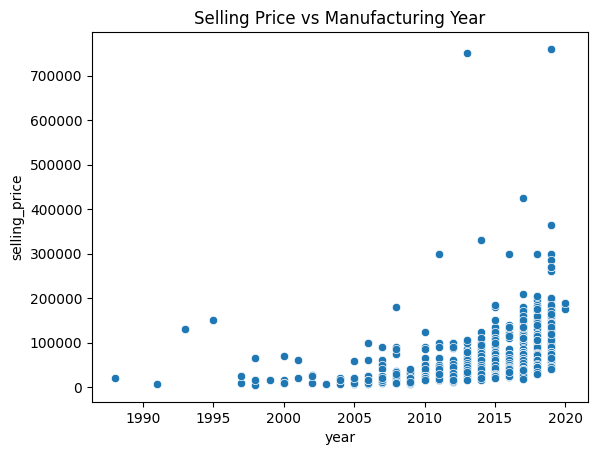

In [13]:
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title("Selling Price vs Manufacturing Year")
plt.show()

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?


In [14]:
current_year = 2023  # Update this as needed
df['age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_depreciation_by_age = df.groupby('age')['depreciation'].mean()
print(avg_depreciation_by_age)

age
3    -34260.000000
4      2954.562500
5     13023.194805
6     22306.082353
7     28328.190476
8     28013.275000
9     34505.606061
10    43086.886792
11    37317.648649
12    47102.666667
13    45658.928571
14    38227.785714
15    54732.428571
16    42399.000000
17    39664.500000
18    44852.000000
19    36852.000000
20             NaN
21             NaN
22    34852.000000
23             NaN
24             NaN
25             NaN
26             NaN
28             NaN
30             NaN
32             NaN
35             NaN
Name: depreciation, dtype: float64


14. Which bike names are priced significantly above the average price for their manufacturing year?


In [15]:
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['avg_price_for_year'] = df['year'].map(avg_price_by_year)
high_priced_bikes = df[df['selling_price'] > 1.5 * df['avg_price_for_year']]['name'].unique()
print(high_priced_bikes)

['Royal Enfield Classic Gunmetal Grey'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Royal Enfield Electra 5 S' 'Royal Enfield Bullet 350'
 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Hero Honda Karizma ZMR [2010]' 'Royal Enfield Thunderbird 350X'
 'Royal Enfield Classic Desert Storm' 'Yamaha FZ25' 'UM Renegade Commando'
 'Royal Enfield Classic 350' 'Royal Enfield Continental GT 650'
 'Harley-Davidson Street Bob' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Classic 500' 'KTM RC 390' 'Bajaj Pulsar 150' 'KTM RC 200'
 'Honda CB Unicorn 150' 'Royal Enfield Bullet 500'
 'Bajaj Dominar 400 [2018]' 'Royal Enfield Interceptor 650'
 'Royal Enfield Machismo' 'KTM 250 Duke' 'Kawasaki Ninja 650 [2018-2019]'
 'Kawasaki Ninja 250R' 'Suzuki GSX S750' 'Yamaha Rx' 'Yamaha Fazer Dlx'
 'Harley-Davidson Street 750' 'TVS Apache RR310' 'BMW G310GS'
 'Royal Enfield Thunderbird 500' 'Roya

15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.


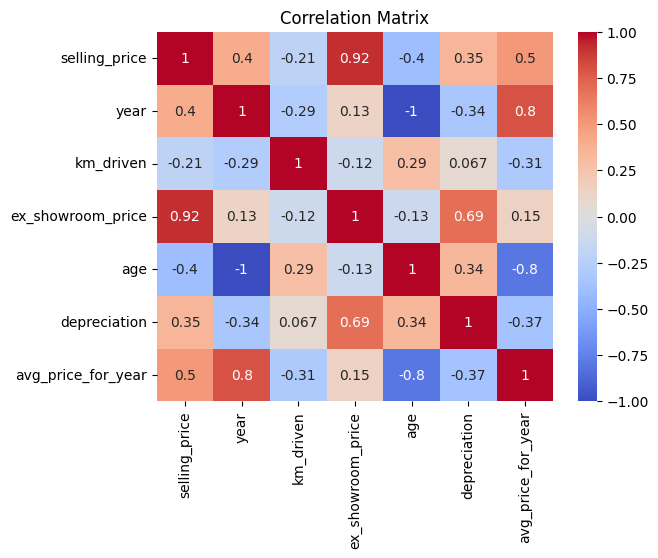

In [16]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

EDA - 2

In [23]:
# Load the dataset
url = "https://drive.google.com/uc?export=download&id=1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U"
df = pd.read_csv(url)

# Display the first few rows
print(df.head())

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?


In [25]:

dealer_avg_price = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
print(dealer_avg_price)


Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

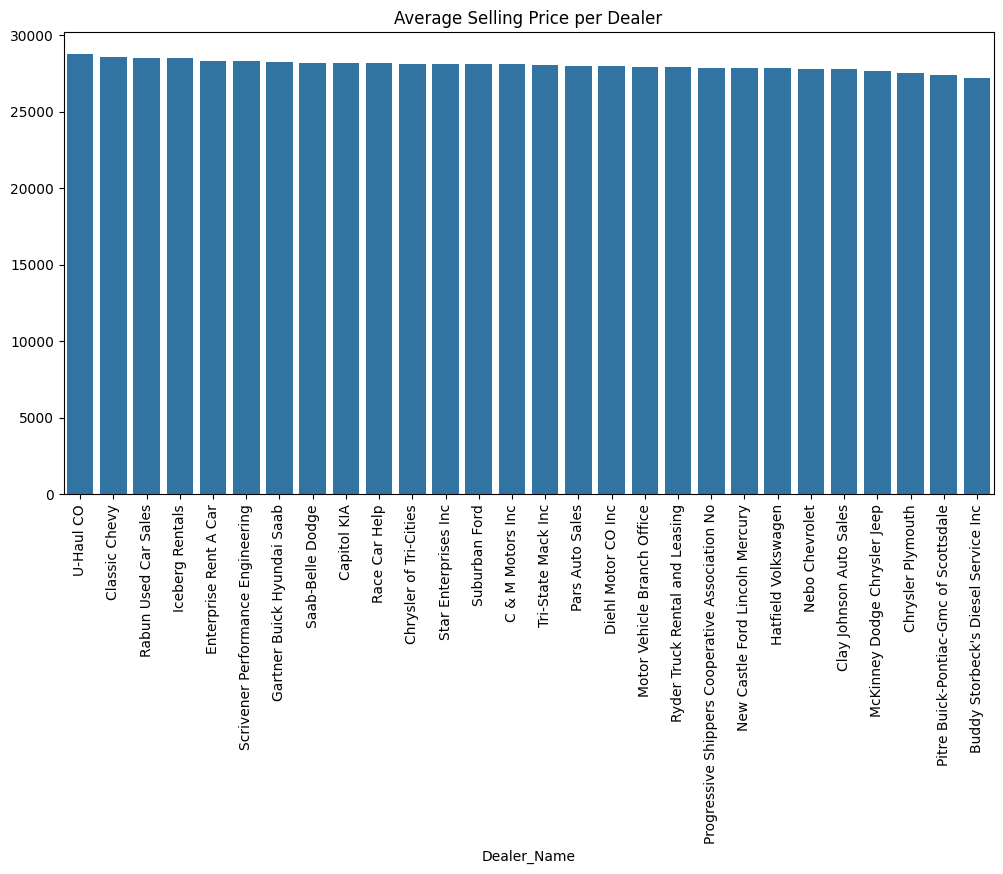

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=dealer_avg_price.index, y=dealer_avg_price.values)
plt.xticks(rotation=90)
plt.title("Average Selling Price per Dealer")
plt.show()


2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [27]:
brand_variation = df.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
print(brand_variation.head(10))  # Top 10 brands with highest variation


Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Buick       17142.232626
Mercury     16445.172195
Nissan      16214.264017
Saturn      15990.223671
Ford        15849.090227
Name: Price ($), dtype: float64


High variation means inconsistent pricing, possibly due to a wide range of models, features, or market demand.

3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

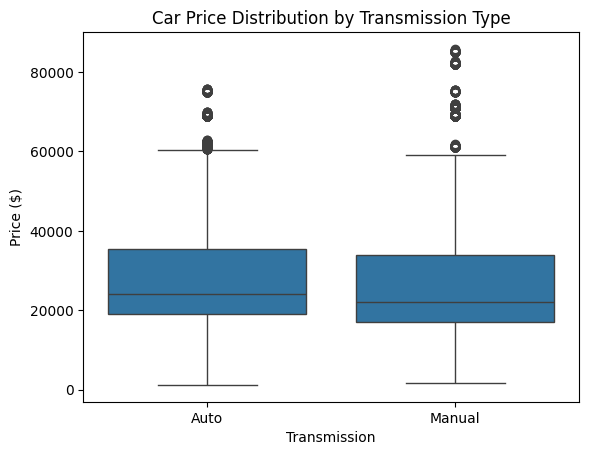

In [28]:
sns.boxplot(x="Transmission", y="Price ($)", data=df)
plt.title("Car Price Distribution by Transmission Type")
plt.show()


4. What is the distribution of car prices across different regions?


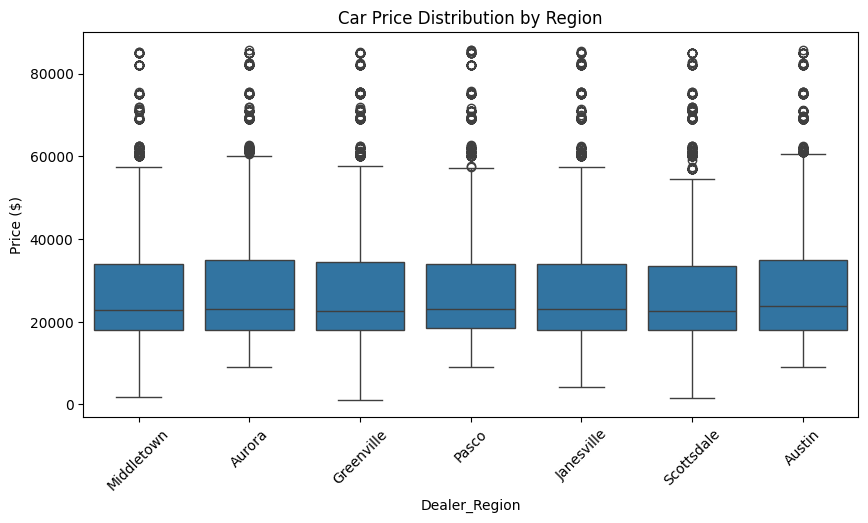

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.title("Car Price Distribution by Region")
plt.xticks(rotation=45)
plt.show()


5. What is the distribution of cars based on body styles?

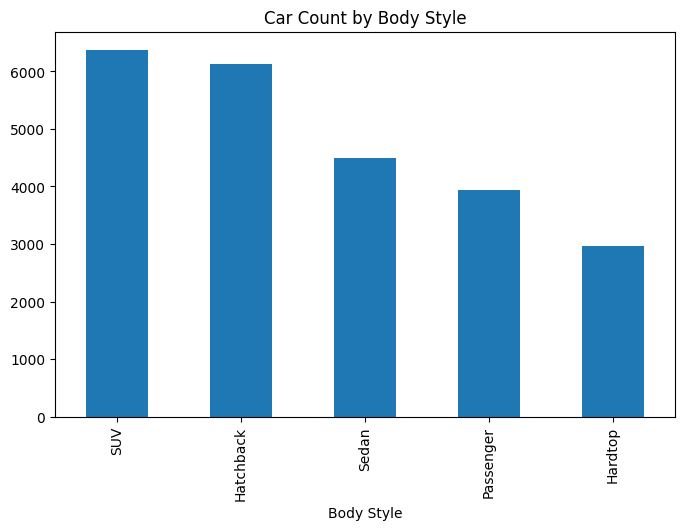

In [30]:
df["Body Style"].value_counts().plot(kind="bar", figsize=(8,5), title="Car Count by Body Style")
plt.show()


6. How does the average selling price of cars vary by customer gender and annual income?

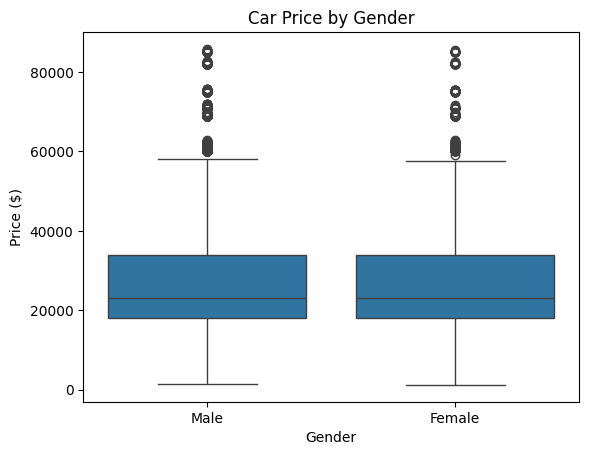

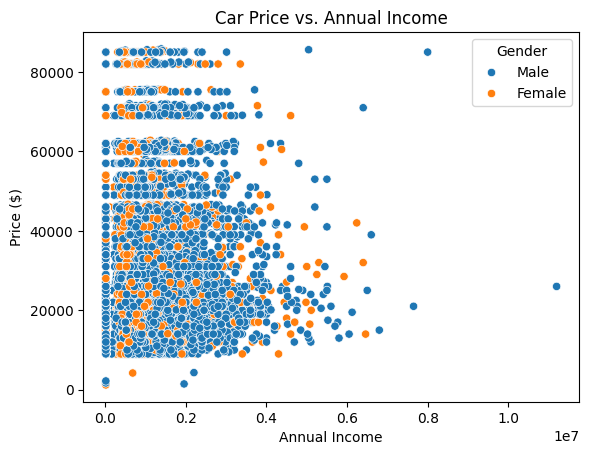

In [31]:
sns.boxplot(x="Gender", y="Price ($)", data=df)
plt.title("Car Price by Gender")
plt.show()

sns.scatterplot(x="Annual Income", y="Price ($)", hue="Gender", data=df)
plt.title("Car Price vs. Annual Income")
plt.show()


7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

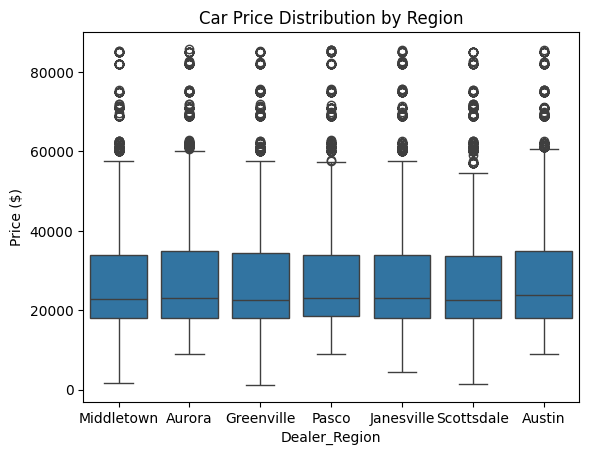

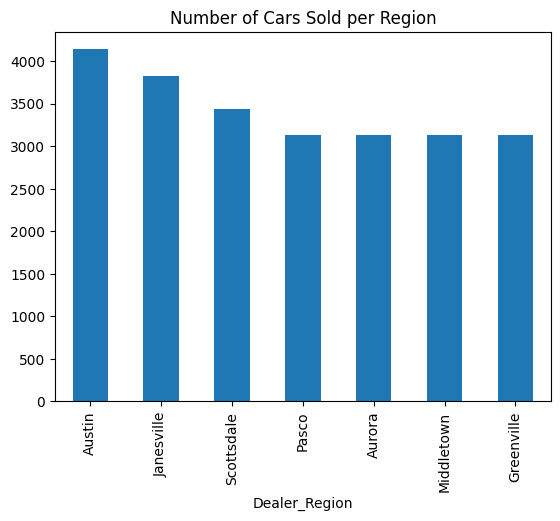

In [32]:
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.title("Car Price Distribution by Region")
plt.show()

df["Dealer_Region"].value_counts().plot(kind="bar", title="Number of Cars Sold per Region")
plt.show()


8. How does the average car price differ between cars with different engine sizes?

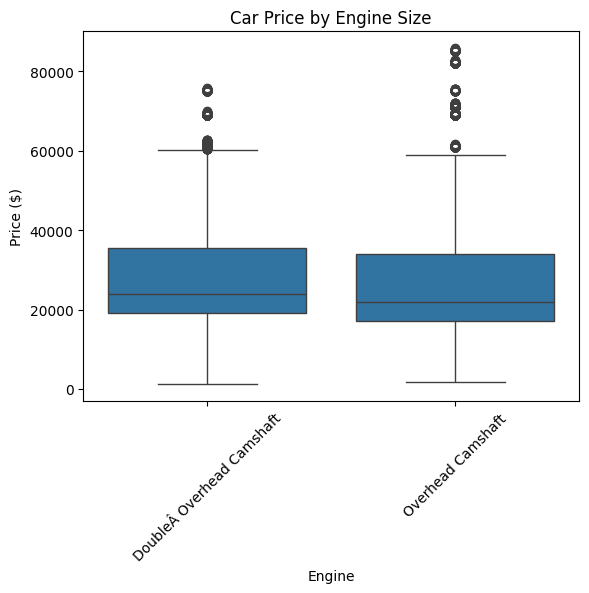

In [33]:
sns.boxplot(x="Engine", y="Price ($)", data=df)
plt.xticks(rotation=45)
plt.title("Car Price by Engine Size")
plt.show()


9. How do car prices vary based on the customer’s annual income bracket?

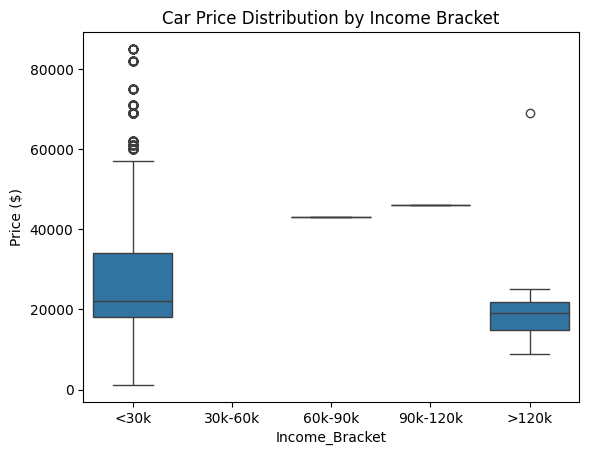

In [34]:
df["Income_Bracket"] = pd.cut(df["Annual Income"], bins=[0, 30000, 60000, 90000, 120000, 200000],
                              labels=["<30k", "30k-60k", "60k-90k", "90k-120k", ">120k"])
sns.boxplot(x="Income_Bracket", y="Price ($)", data=df)
plt.title("Car Price Distribution by Income Bracket")
plt.show()


10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

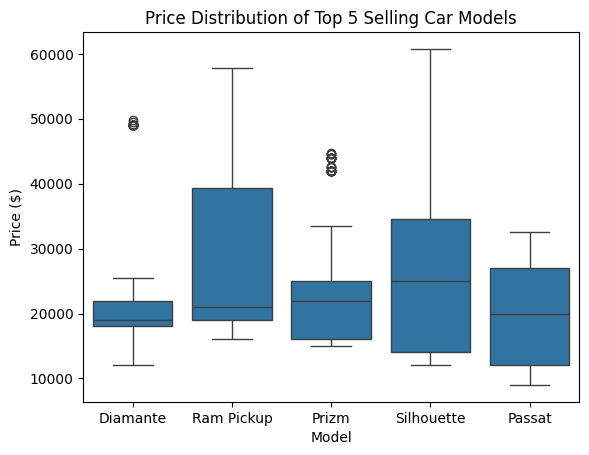

In [35]:
top_models = df["Model"].value_counts().head(5).index
filtered_df = df[df["Model"].isin(top_models)]
sns.boxplot(x="Model", y="Price ($)", data=filtered_df)
plt.title("Price Distribution of Top 5 Selling Car Models")
plt.show()


11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

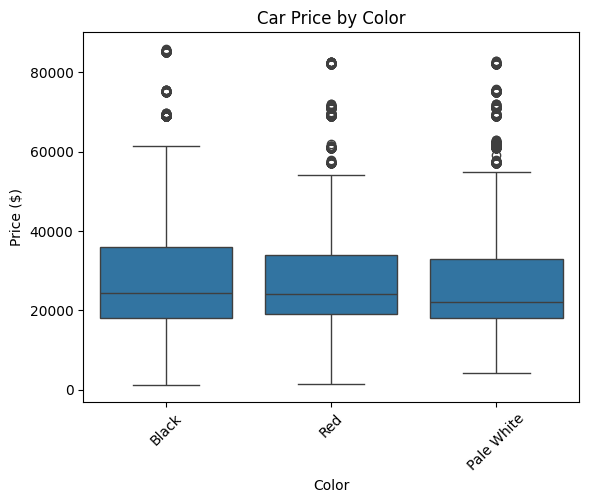

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64

In [36]:
sns.boxplot(x="Color", y="Price ($)", data=df)
plt.xticks(rotation=45)
plt.title("Car Price by Color")
plt.show()

df.groupby("Color")["Price ($)"].std().sort_values(ascending=False).head(10)


12. Is there any seasonal trend in car sales based on the date of sale?

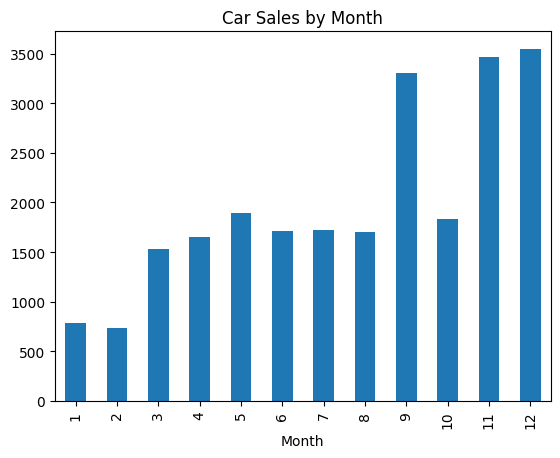

In [37]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

monthly_sales = df.groupby("Month").size()
monthly_sales.plot(kind="bar", title="Car Sales by Month")
plt.show()


13. How does the car price distribution change when considering different combinations of body style and transmission type?

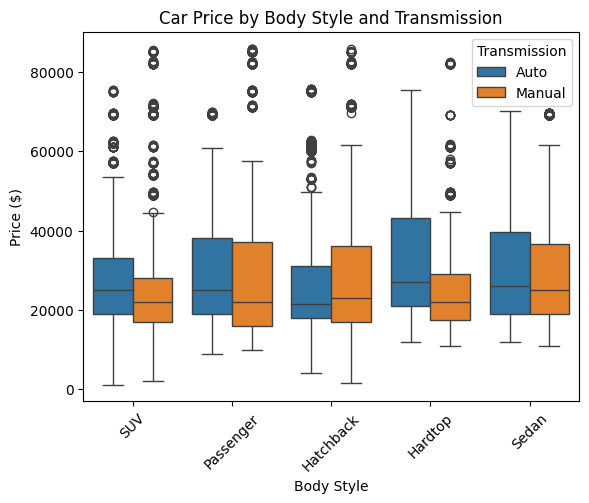

In [38]:
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df)
plt.xticks(rotation=45)
plt.title("Car Price by Body Style and Transmission")
plt.show()


14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

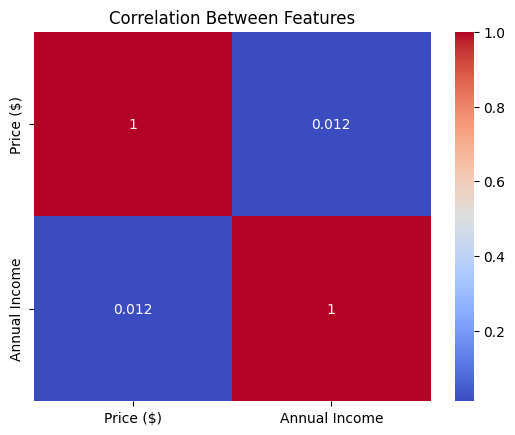

In [39]:
import seaborn as sns
correlation_matrix = df[["Price ($)", "Annual Income"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()


15. How does the average car price vary across different car models and engine types?

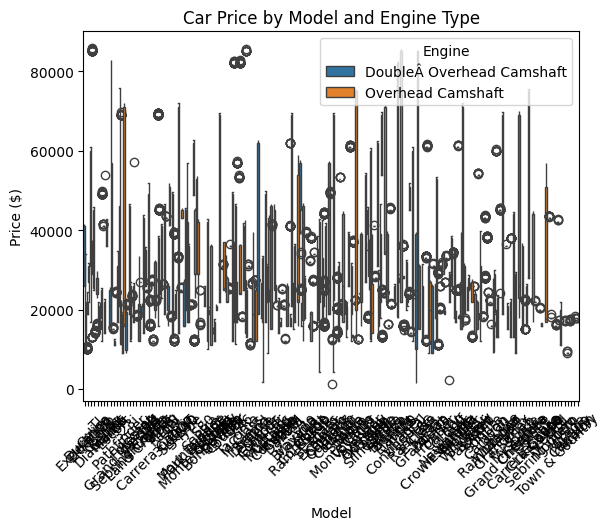

In [40]:
sns.boxplot(x="Model", y="Price ($)", hue="Engine", data=df)
plt.xticks(rotation=45)
plt.title("Car Price by Model and Engine Type")
plt.show()


EDA - 3

In [41]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB"

# Load the dataset
df = pd.read_csv(url)

# Display first 5 rows
df.head()


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

1. What is the average rating for each product category?



In [44]:
avg_rating_per_category = df.groupby("category")["rating"].mean().reset_index()
print(avg_rating_per_category)



                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


<ipython-input-45-ac867de69edd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="category", data=avg_rating_per_category, palette="coolwarm")


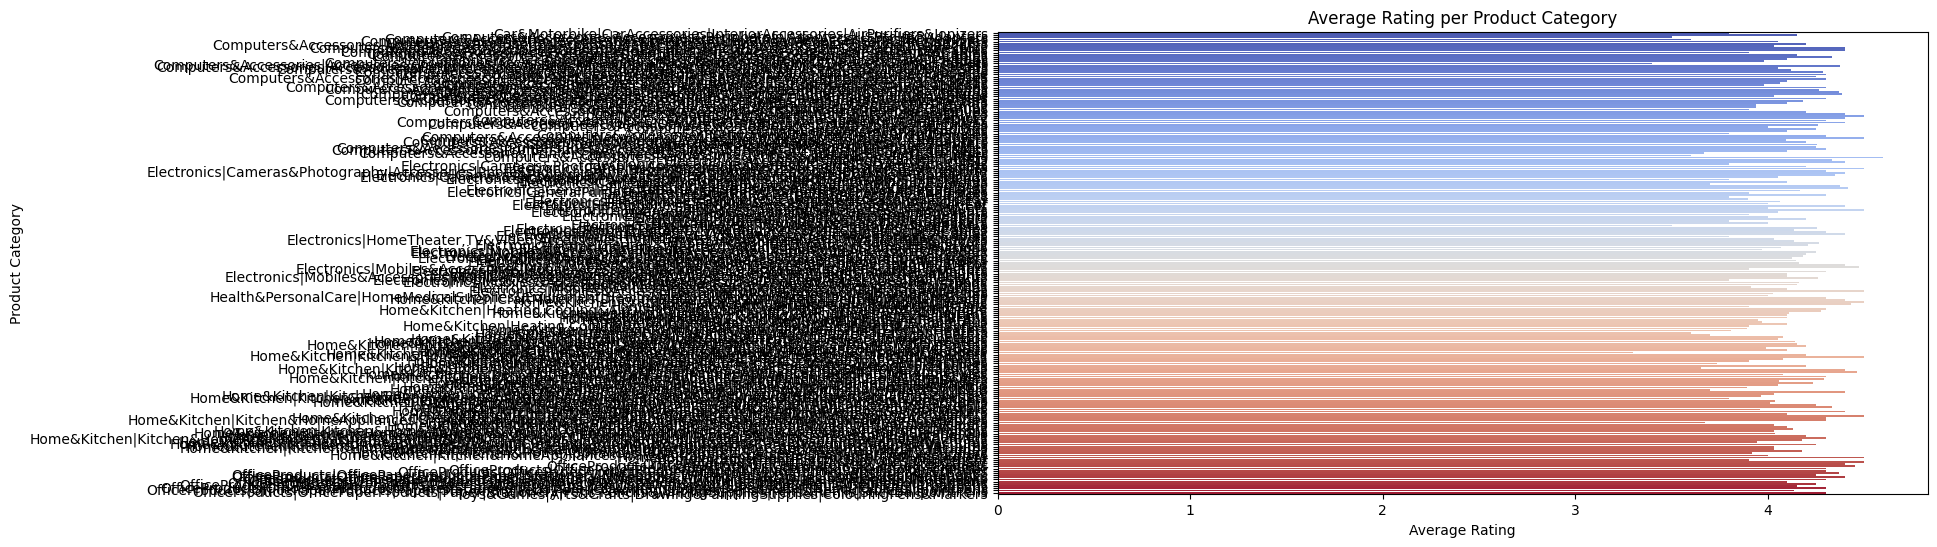

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x="rating", y="category", data=avg_rating_per_category, palette="coolwarm")
plt.xlabel("Average Rating")
plt.ylabel("Product Category")
plt.title("Average Rating per Product Category")
plt.show()


2. What are the top products by rating count in each category?

In [46]:
top_products_by_category = df.loc[df.groupby("category")["rating_count"].idxmax()][["category", "product_name", "rating_count"]]
print(top_products_by_category)


                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222  
772   H

3. What is the distribution of discounted prices vs. actual prices?

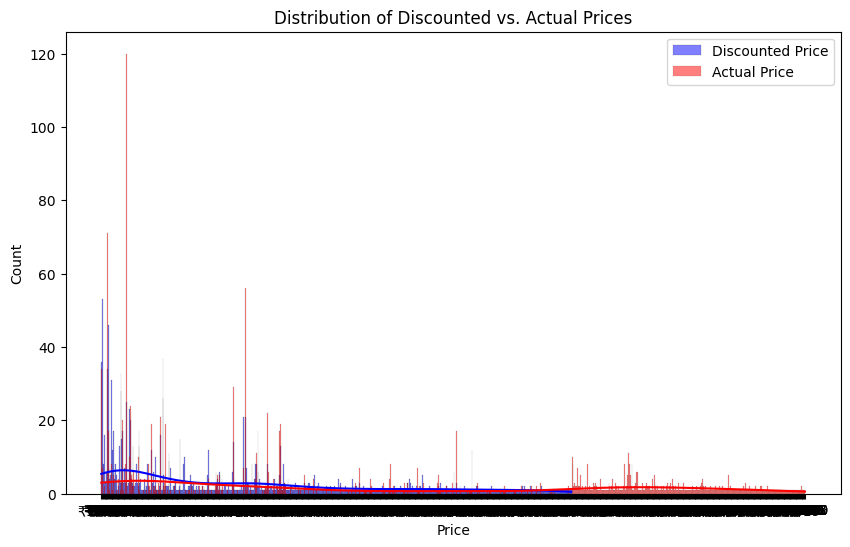

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df["discounted_price"], label="Discounted Price", kde=True, color="blue")
sns.histplot(df["actual_price"], label="Actual Price", kde=True, color="red")
plt.legend()
plt.title("Distribution of Discounted vs. Actual Prices")
plt.xlabel("Price")
plt.show()


4. How does the average discount percentage vary across categories?

<ipython-input-50-7747f70f2707>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="discount_percentage", y="category", data=avg_discount_per_category, palette="viridis")


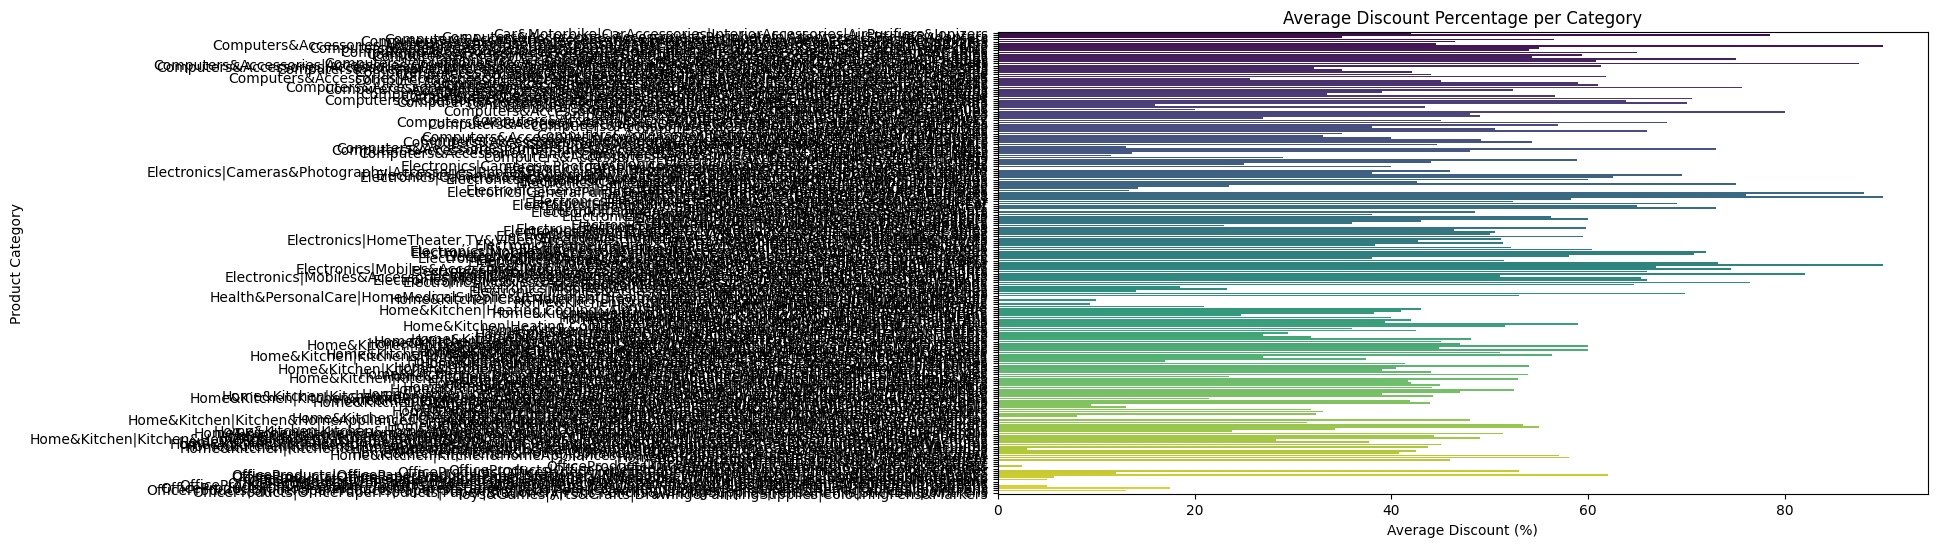

In [50]:
avg_discount_per_category = df.groupby("category")["discount_percentage"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="discount_percentage", y="category", data=avg_discount_per_category, palette="viridis")
plt.xlabel("Average Discount (%)")
plt.ylabel("Product Category")
plt.title("Average Discount Percentage per Category")
plt.show()


5. What are the most popular product names?

In [51]:
top_product_names = df["product_name"].value_counts().head(10)
print(top_product_names)


product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                             

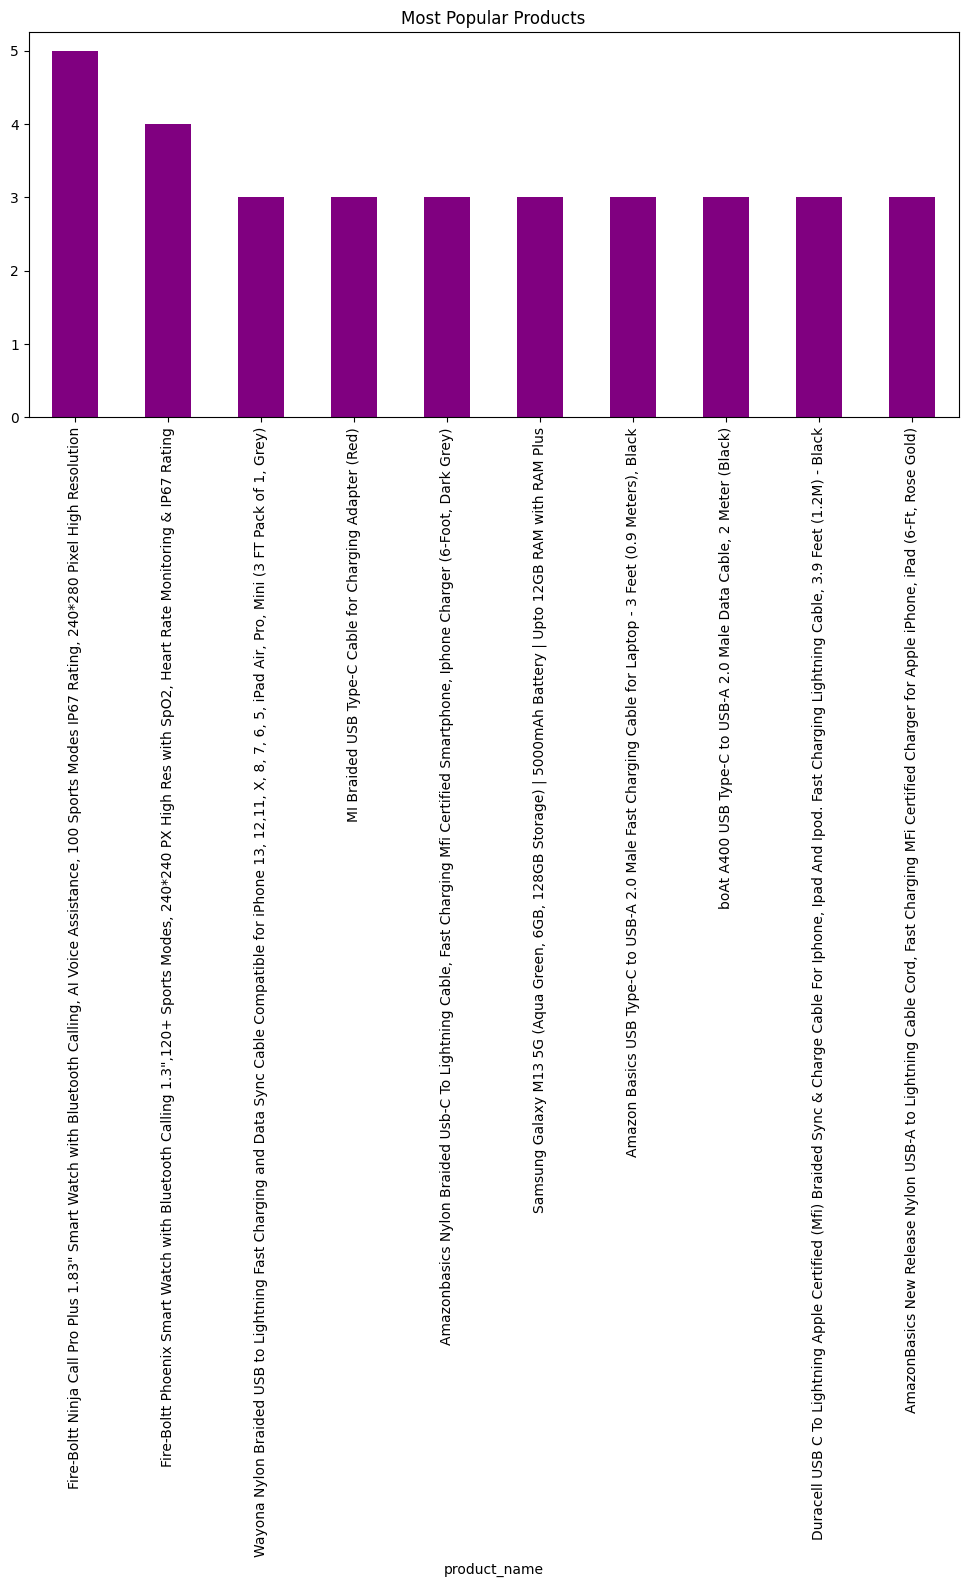

In [52]:
top_product_names.plot(kind="bar", figsize=(12, 5), color="purple", title="Most Popular Products")
plt.show()


6. What are the most popular product keywords?

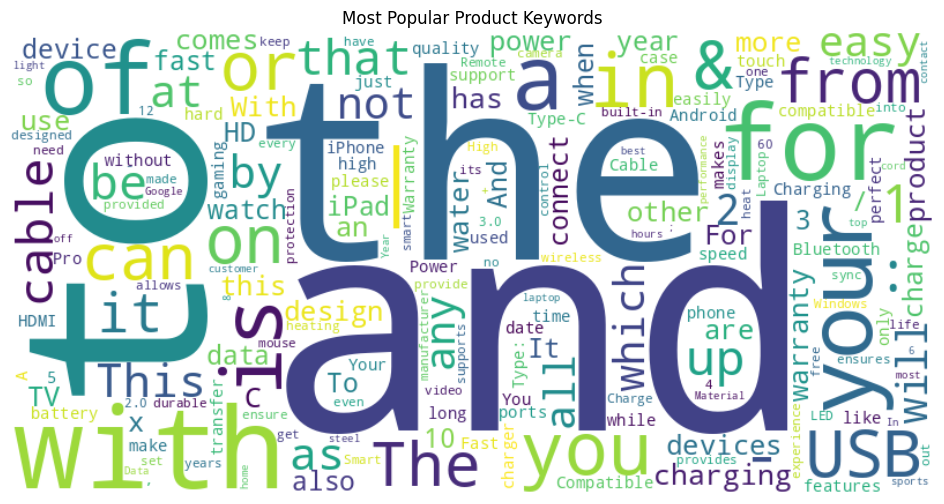

In [53]:
from collections import Counter
from wordcloud import WordCloud

# Combine all text
text = " ".join(df["about_product"].dropna())

# Get word frequency
word_counts = Counter(text.split())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Show word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Popular Product Keywords")
plt.show()


7. What are the most popular product reviews?

In [54]:
top_reviews = df["review_content"].value_counts().head(10)
print(top_reviews)


review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a littl

8. What is the correlation between discounted_price and rating?

                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


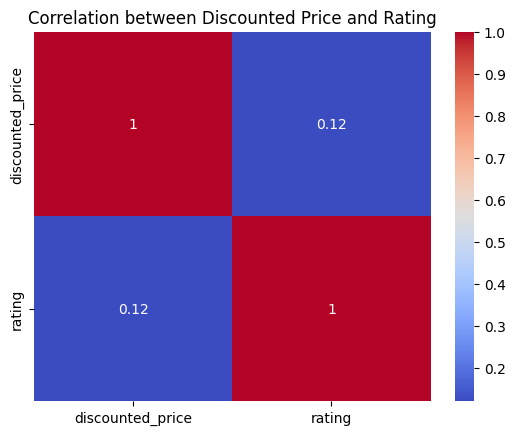

In [57]:
correlation = df[["discounted_price", "rating"]].corr()
print(correlation)

# Heatmap
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation between Discounted Price and Rating")
plt.show()


9. What are the Top 5 categories based on the highest ratings?

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


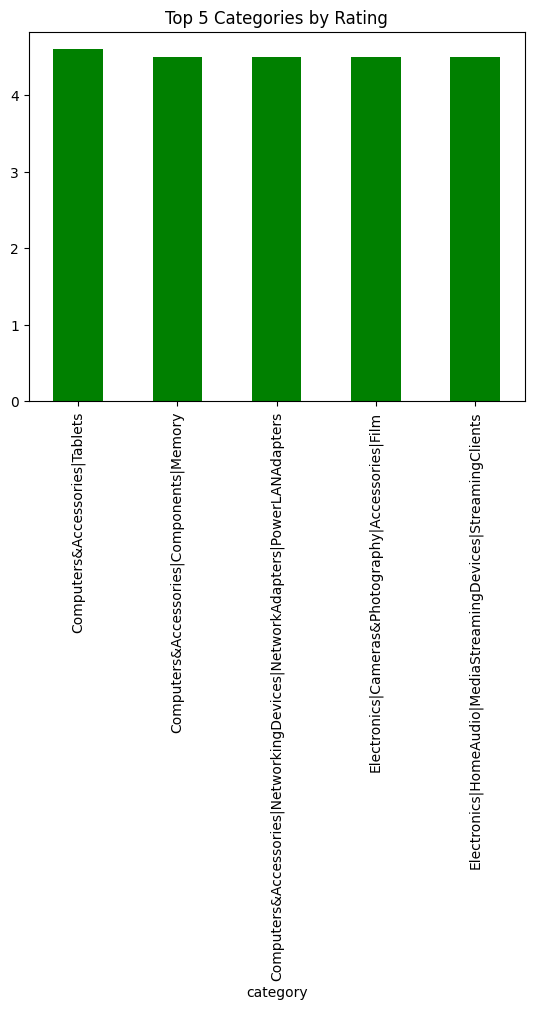

In [58]:
top_categories_by_rating = df.groupby("category")["rating"].mean().nlargest(5)
print(top_categories_by_rating)

# Visualization
top_categories_by_rating.plot(kind="bar", color="green", title="Top 5 Categories by Rating")
plt.show()


10. Identify areas for improvement based on data analysis

Low Rating Categories: Identify categories with lower ratings and analyze common complaints.

High Discounts: Check if higher discounts correlate with lower ratings (possible quality concerns).

Review Sentiment Analysis: Perform sentiment analysis on reviews to get customer feedback insights.

Price Optimization: Analyze pricing trends and see which price ranges perform best

EDA - 4

In [59]:
import pandas as pd
url = "https://drive.google.com/uc?export=download&id=1JVgy2yXUOREkzRdCeWjep626uvvF94pP"

# Read the dataset
df = pd.read_csv(url)

# Display first 5 rows
df.head()


Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful

In [62]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with appropriate replacements
df.fillna(method='ffill', inplace=True)  # Forward fill for missing data
# Check duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate Rows: 0


<ipython-input-62-d4f751abb89a>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill for missing data


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram


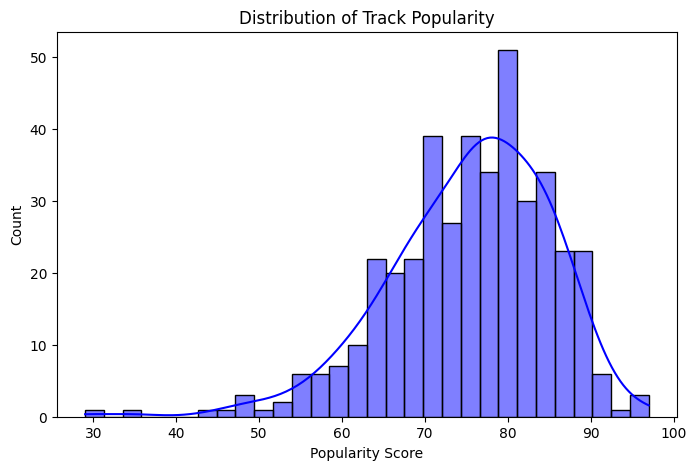

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["Popularity"], bins=30, kde=True, color='blue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()


3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot


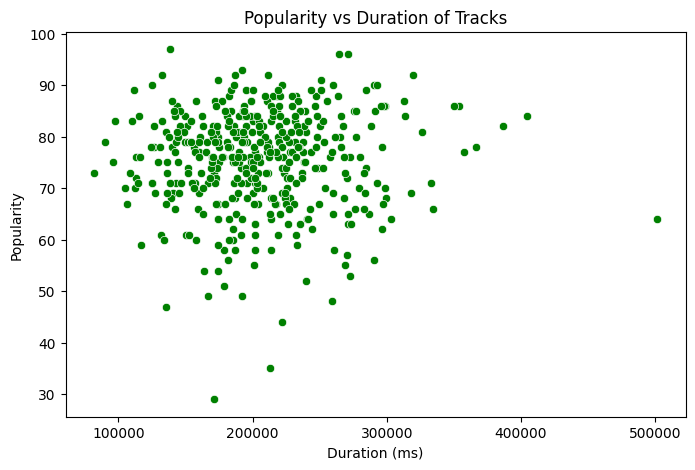

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], color="green")
plt.title("Popularity vs Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot

<ipython-input-65-7941bcd7c811>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")


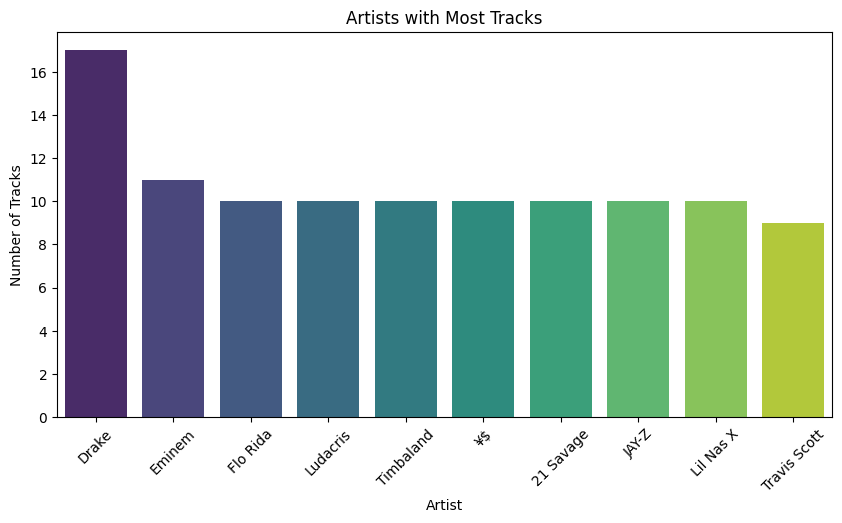

In [65]:
plt.figure(figsize=(10, 5))
top_artists = df["Artist"].value_counts().nlargest(10)  # Top 10 artists by track count
sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Artists with Most Tracks")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.show()


5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [66]:
least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist

In [67]:
top_artists = df.groupby("Artist")["Popularity"].mean().nlargest(5)
print(top_artists)


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [68]:
top_artist_tracks = df[df["Artist"].isin(top_artists.index)].groupby("Artist")["Popularity"].idxmax()
most_popular_tracks = df.loc[top_artist_tracks, ["Artist", "Track Name", "Popularity"]]
print(most_popular_tracks)


           Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


8.  Visualize relationships between multiple numerical variables simultaneously using a pair plot

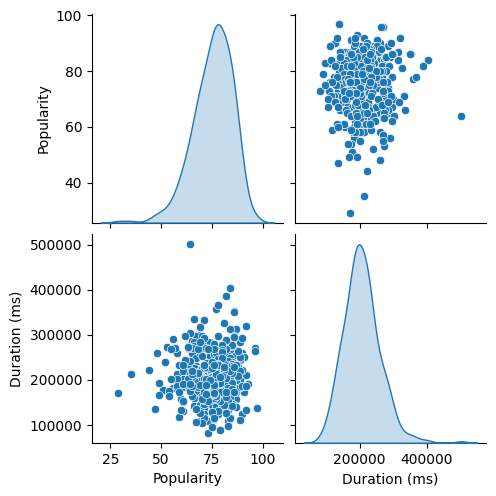

In [69]:
import seaborn as sns

sns.pairplot(df[["Popularity", "Duration (ms)"]], diag_kind="kde")
plt.show()


9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot

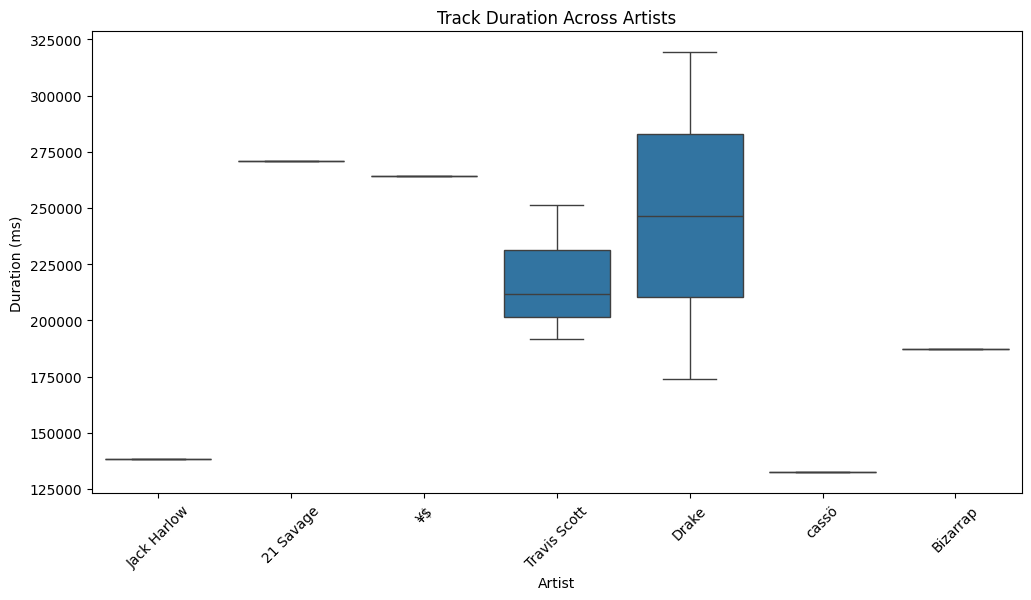

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=df.nlargest(10, "Popularity"))
plt.xticks(rotation=45)
plt.title("Track Duration Across Artists")
plt.show()


10.  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

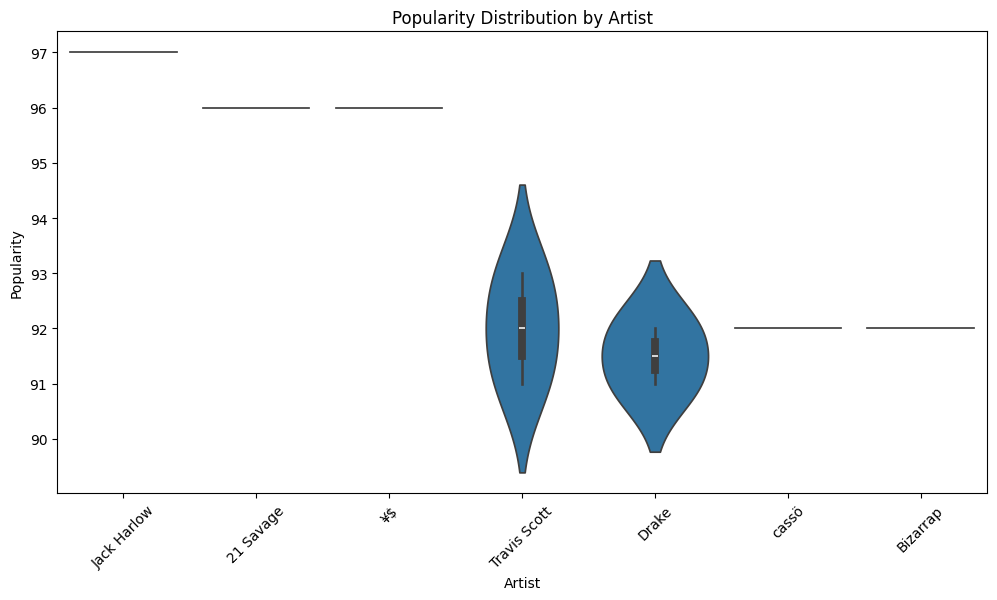

In [71]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=df.nlargest(10, "Popularity"))
plt.xticks(rotation=45)
plt.title("Popularity Distribution by Artist")
plt.show()
